# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

# LOAD DATA
## Read CSV

In [2]:
states = pd.read_csv('ClusterData.csv')
list(states.columns.values)

['State',
 'state_code',
 'Extraversion',
 'Agreeableness',
 'Conscientiousness',
 'Neuroticism',
 'Openness',
 'PsychRegions',
 'region',
 'division']

## Save numerical data only

In [3]:
#Include only columns 2 and after in the dataset, exclude first column state for index
st = states[states.columns[2:]]

#Index using the first column state
st.index = states.iloc[:,1]
#st
#st.index

In [4]:
st.index

Index(['AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN',
       'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'],
      dtype='object', name='state_code')

In [5]:
#Dimension of dataset: st.shape
st.dtypes

Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Openness             float64
PsychRegions           int64
region                 int64
division               int64
dtype: object

In [6]:
st1 = st[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'PsychRegions', 'region', 'division']]

#st1

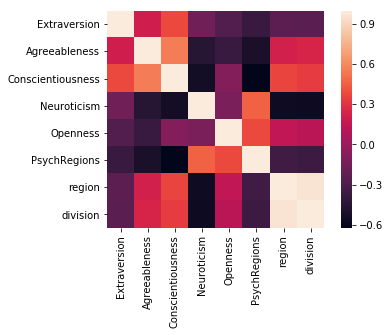

In [7]:
#The color palette represents the amount of correlation among the variables. The lighter shade represents 
#high correlation.

import seaborn as sns
cor = st1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [8]:
# To give equal importance to all features, scale continuous features using MinMaxScaler as the feature matrix is a 
# mix of binary and continuous features 
mms = MinMaxScaler()
mms.fit(st1)
data_transformed = mms.transform(st1)

C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
#For each k value, initialize k-means and use the inertia attribute to identify the sum of squared distances of 
#samples to the nearest cluster centre. As k increases, the sum of squared distance tends to be zero.

#If k is set to its maximum value n #(where n is number of samples) each sample will form its own cluster meaning 
#sum of squared distances equals zero.

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

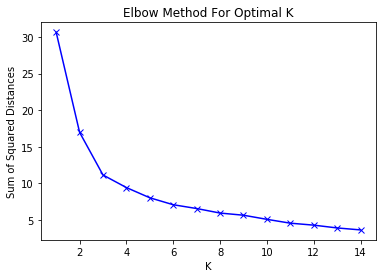

In [10]:
#In the below pot I will pick the elbow at k=3 indicating the optimal k for this dataset is 3.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal K')
plt.show()

In [11]:
# Use n_clusters=3 as the k value to create the model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [12]:
# Fit the kmeans model to the data
kmeans.fit(st1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# Predict the clusters
predicted_clusters = kmeans.predict(st1)
predicted_clusters

array([0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       1, 2, 0, 1])

In [14]:
center = kmeans.cluster_centers_
center

array([[58.16111111, 58.01666667, 58.00555556, 45.01111111, 45.13333333,
         1.22222222,  2.55555556,  4.77777778],
       [40.18666667, 48.6       , 49.        , 44.52      , 53.90666667,
         1.8       ,  3.46666667,  7.        ],
       [49.04666667, 43.68      , 41.79333333, 62.06      , 50.1       ,
         2.46666667,  1.8       ,  3.13333333]])

In [15]:
print(kmeans.labels_)

[0 1 2 1 1 2 2 0 0 1 0 2 0 1 2 2 2 1 2 0 0 0 0 1 0 1 2 2 1 2 0 0 2 1 1 2 2
 0 0 0 0 0 1 1 1 2 0 1]


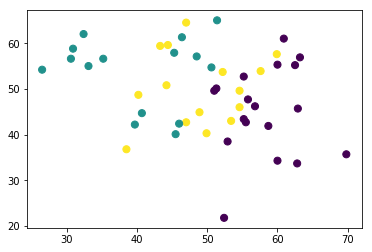

In [16]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Extraversion'], st1['Openness'], c=predicted_clusters, s=50, cmap='viridis')

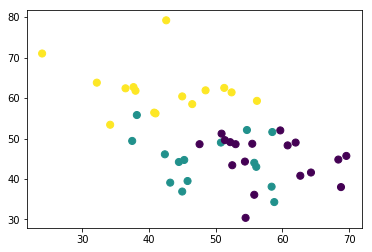

In [17]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Conscientiousness'], st1['Neuroticism'], c=predicted_clusters, s=50, cmap='viridis')

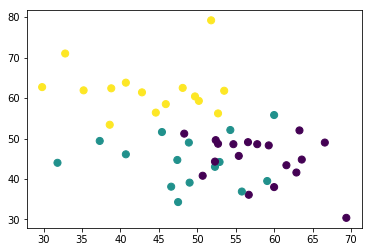

In [18]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Agreeableness'], st1['Neuroticism'], c=predicted_clusters, s=50, cmap='viridis')

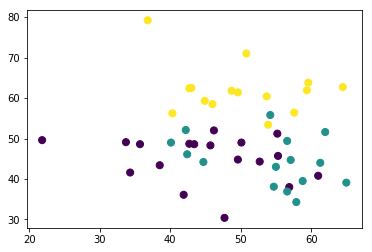

In [19]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Openness'], st1['Neuroticism'], c=predicted_clusters, s=50, cmap='viridis')

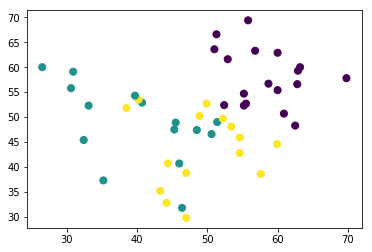

In [20]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Extraversion'], st1['Agreeableness'], c=predicted_clusters, s=50, cmap='viridis')

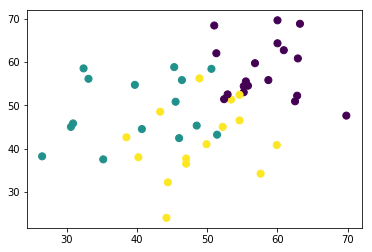

In [21]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Extraversion'], st1['Conscientiousness'], c=predicted_clusters, s=50, cmap='viridis')

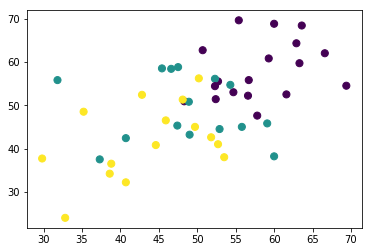

In [22]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly and the columns that are helping this prediction
plt.scatter(st1['Agreeableness'], st1['Conscientiousness'], c=predicted_clusters, s=50, cmap='viridis')

In [23]:
#Compare the kmeans predicted vs original PsychRegions for each state
compare_df = pd.DataFrame({'Actual': st1['PsychRegions'], 'Predicted': predicted_clusters}, index=st1.index)
#compare_df.head(50)
compare_df.sort_values('Predicted').reset_index()
#compare_df.index

,state_code,Actual,Predicted
0,AL,1,0
1,MO,1,0
2,MS,1,0
3,MN,1,0
4,MI,1,0
5,NC,2,0
6,ND,1,0
7,WI,1,0
8,SC,1,0
9,IL,1,0


In [24]:
#compare_df.to_excel("kmeansoutput.xlsx")

In [25]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = compare_df.index,
           locationmode = 'USA-states',
           z = compare_df['Predicted'], 
           #text = compare_df.index,
           colorbar = {'title':'PsychRegions'})
layout = dict(title = 'US Psych Regions - K-Means Clusters', 
             geo = dict(showframe = False, 
                       projection = {'type': 'albers usa'}))
choromap3 = go.Figure(data = [data], layout=layout)

iplot(choromap3)

In [26]:
#Create Linkage Matrix
Z = linkage(st1, 'ward')

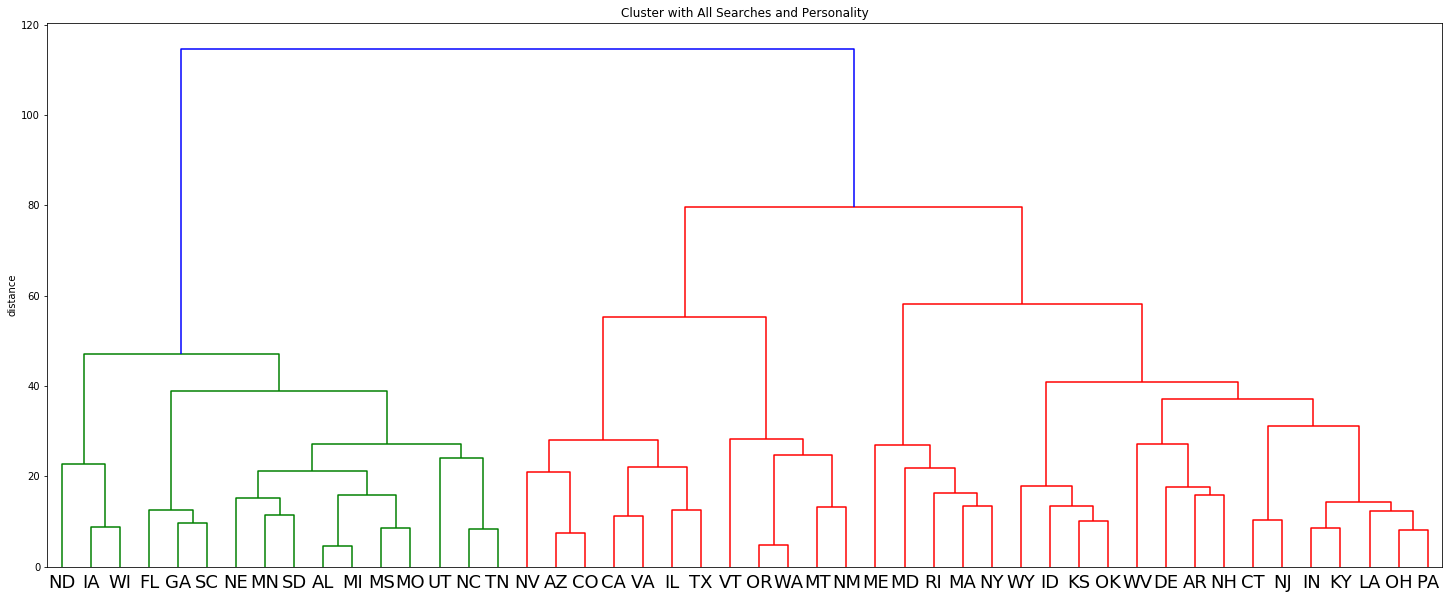

In [27]:
#Plot Dendogram of clusters
plt.figure(figsize = (25, 10))
plt.title('Cluster with All Searches and Personality')
plt.ylabel('distance')
dendrogram(
    Z,
    labels = st1.index,
    leaf_rotation = 0.,
    leaf_font_size = 18.,
)
plt.show()

In [28]:
#Let us see how K-Nearest Neighbors classifier predicts our regions
X = st[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'region', 'division']]
y = st['PsychRegions']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_scaler = mms.fit(X_train)

C:\Users\Owner\Anaconda3-2018.12\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [31]:
#Transform the training and test data using scaled training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
target_names = ["1", "2", "3"]

k: 1, Train/Test Score: 1.000/0.750
k: 3, Train/Test Score: 0.861/0.750
k: 5, Train/Test Score: 0.833/0.750
k: 7, Train/Test Score: 0.833/0.667
k: 9, Train/Test Score: 0.778/0.667
k: 11, Train/Test Score: 0.806/0.667
k: 13, Train/Test Score: 0.694/0.667
k: 15, Train/Test Score: 0.667/0.667
k: 17, Train/Test Score: 0.667/0.667
k: 19, Train/Test Score: 0.667/0.583


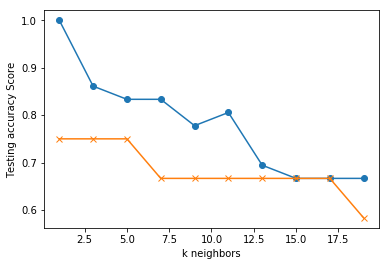

In [33]:
# Loop through different k values and look for the highest accuracy
# Use odd numbers to avoid any ties

from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
# k: 3 provides the best accuracy where the classifier is stablized on the split sample
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
print('k=3 Test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Accuracy: 0.500


In [35]:
# k: 3 provides the best accuracy where the classifier is stablized. Now fit the entire X, y sample.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print('k=3 Test Accuracy: %.3f' % knn.score(X, y))

k=3 Test Accuracy: 0.812


In [36]:
#Now, predict the entire X
predicted_class = knn.predict(X)
print(predicted_class)

[1 1 1 2 1 3 3 1 1 1 3 1 1 1 1 3 3 3 3 1 1 1 1 2 1 2 1 3 2 3 1 1 3 1 2 3 3
 1 1 1 1 1 3 2 2 3 1 1]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted_class, target_names=target_names))

              precision    recall  f1-score   support

           1       0.78      0.88      0.82        24
           2       0.86      0.60      0.71        10
           3       0.86      0.86      0.86        14

   micro avg       0.81      0.81      0.81        48
   macro avg       0.83      0.78      0.80        48
weighted avg       0.82      0.81      0.81        48



In [38]:
#Compare the predicted vs original PsychRegions for each state for the classification sample
compare_df = pd.DataFrame({'Actual': y, 'Predicted': predicted_class})
compare_df.head(50)
compare_df.sort_values('Predicted').reset_index()

,state_code,Actual,Predicted
0,AL,1,1
1,UT,2,1
2,TX,3,1
3,TN,1,1
4,SD,1,1
5,SC,1,1
6,OK,1,1
7,ND,1,1
8,NC,2,1
9,NH,3,1


In [39]:
data = dict(type = 'choropleth', 
           locations = compare_df.index,
           locationmode = 'USA-states',
           z = compare_df['Predicted'], 
           colorbar = {'title':'PsychRegions'})
layout = dict(title = 'US Psych Regions - K-Nearest Neighors', 
             geo = dict(showframe = False, 
                       projection = {'type': 'albers usa'}))
choromap3 = go.Figure(data = [data], layout=layout)

iplot(choromap3)